<a href="https://colab.research.google.com/github/VivianeSouza923/Wproject_Iot/blob/main/Treinamento_Bot_Iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
!pip install shap
!pip install NumPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:0

In [ ]:
# importando o pandas, que a gente vai precisar.
import pandas as pd
# importando o pycaret. te conhecendo agora, amigo
from pycaret.utils import version
# qual a versão?
print('Pycaret:'+version())

Pycaret:3.0.2


In [ ]:
# ler base de dados
data = pd.read_csv('dset.csv')
# mostra um gostinho da base de dados
data.head()

,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,tcp,192.168.100.147,49960,192.168.100.7,80.0,9.0,0.068909,75.0,0.000000,1.0,0.068909,96.0,14.511893,0.566862,0.137818,1.0
1,arp,192.168.100.7,-1,192.168.100.147,-1.0,10.0,0.000000,2.0,0.000131,2.0,0.000131,1.0,0.000000,0.000000,0.000131,1.0
2,tcp,192.168.100.147,49962,192.168.100.7,80.0,11.0,0.064494,75.0,0.000000,1.0,0.064494,96.0,15.505319,0.567549,0.128988,1.0
3,tcp,192.168.100.147,49964,192.168.100.7,80.0,12.0,0.064189,75.0,0.000000,1.0,0.064189,96.0,15.578993,0.567570,0.128378,1.0
4,tcp,192.168.100.147,49966,192.168.100.7,80.0,13.0,0.063887,75.0,0.000000,1.0,0.063887,96.0,15.652637,0.567630,0.127774,1.0


In [ ]:
# pegar a informação da GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 27 11:02:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.37       Driver Version: 527.37       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   63C    P8    N/A /  N/A |     92MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from pycaret.classification import *
from pycaret.classification import compare_models
best = setup(data, target = 'attack', use_gpu = True)
available_estimators = models()
print(available_estimators)

,Description,Value
0,Session id,3348
1,Target,attack
2,Target type,Binary
3,Original data shape,"(3668522, 16)"
4,Transformed data shape,"(3668522, 39)"
5,Transformed train set shape,"(2567965, 39)"
6,Transformed test set shape,"(1100557, 39)"
7,Numeric features,10
8,Categorical features,5
9,Preprocess,True


                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr    

In [ ]:
best = compare_models(include = ['knn','lr','svm','nb','dt'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.9998,1.0000,1.0000,1.0000,0.9128,0.9150,252.8040
dt,Decision Tree Classifier,1.0000,0.9611,1.0000,1.0000,1.0000,0.9564,0.9571,66.7510
knn,K Neighbors Classifier,0.9999,0.8910,1.0000,0.9999,1.0000,0.6593,0.6901,2796.7380
svm,SVM - Linear Kernel,0.9998,0.0000,0.9999,0.9999,0.9999,0.0433,0.0488,67.8410
nb,Naive Bayes,0.9978,0.9971,0.9979,1.0000,0.9989,0.0776,0.1652,47.0220


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3348, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

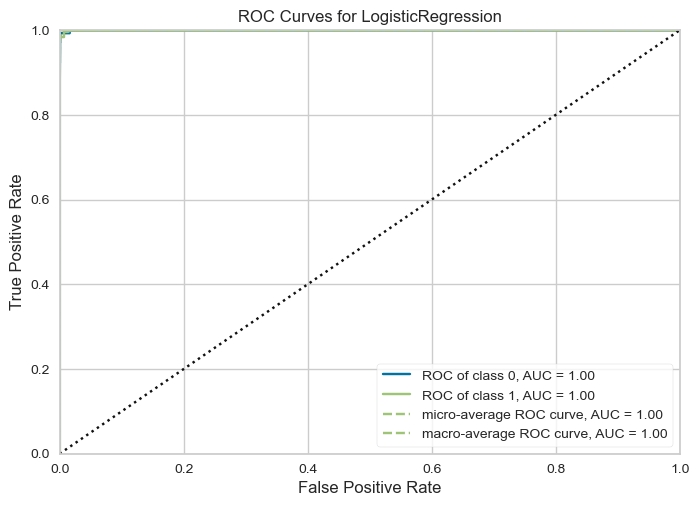

In [ ]:
plot_model(best, plot='auc')

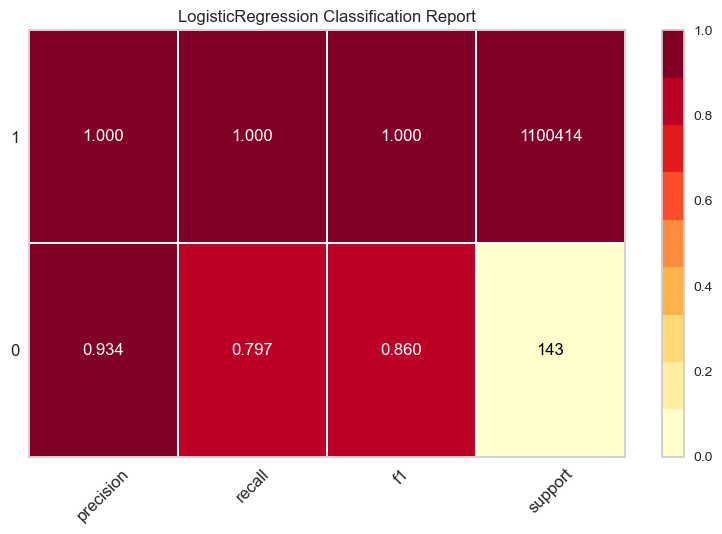

In [ ]:
plot_model(best, plot = 'class_report')

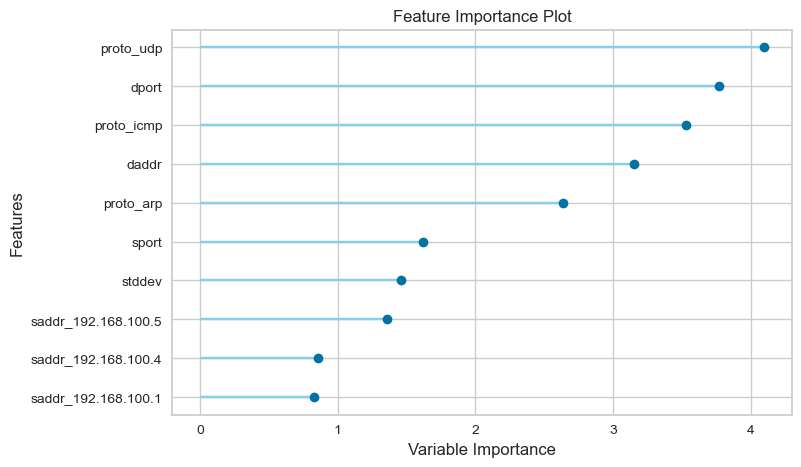

In [ ]:
plot_model(best, plot = 'feature')